# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:a">Neste projeto, o objetivo principal é prever a renda mensal de indivíduos com base em um conjunto de variáveis pessoais e socioeconômicas.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                | Data de referência da informação                    | object       |
| id_cliente              | Identificador único do cliente                      | int          |
| sexo                    | Gênero do cliente                                   | object       |
| posse_de_veiculo        | Indica se o cliente possui veículo próprio          | object       |
| posse_de_imovel         | Indica se o cliente possui imóvel próprio           | object       |
| qtd_filhos              | Quantidade de filhos do cliente                     | int          |
| tipo_renda              | Tipo de ocupação ou fonte de renda                  | object       |
| educacao                | Nível de escolaridade do cliente                    | object       |
| estado_civil            | Estado civil do cliente                             | object       |
| tipo_residencia         | Tipo de moradia do cliente                          | object       |
| idade                   | Idade atual do cliente                              | int          |
| tempo_emprego           | Tempo de emprego atual                              | float        |
| qt_pessoas_residencia   | Número de pessoas que moram com o cliente           | float        |
| renda                   | Renda mensal declarada do cliente                   | float        |






#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [193]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression


%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [132]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)
renda.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [134]:
renda.dtypes

data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [137]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 2341.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [144]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




data_ref      datetime64[ns]
id_cliente             int64
dtype: object


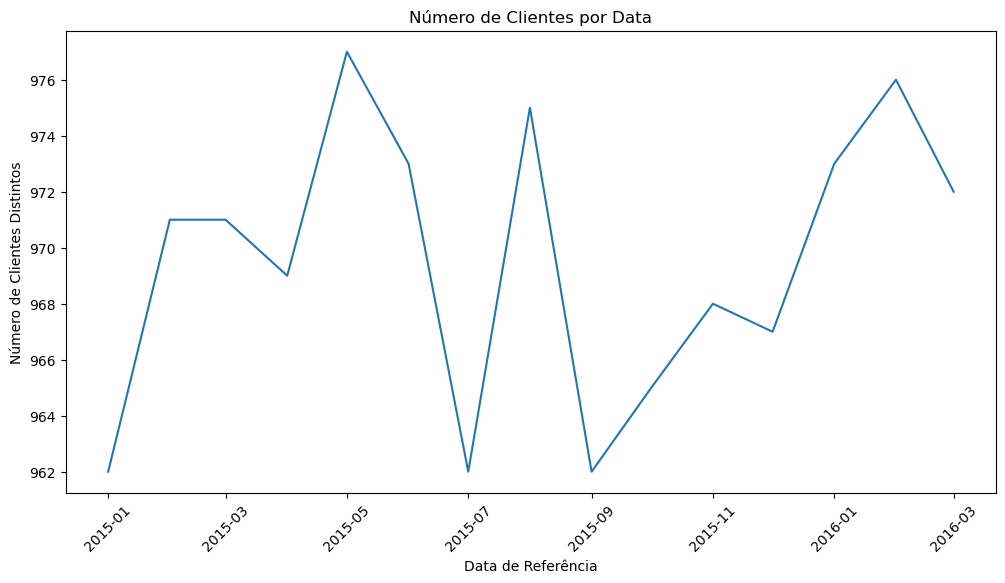

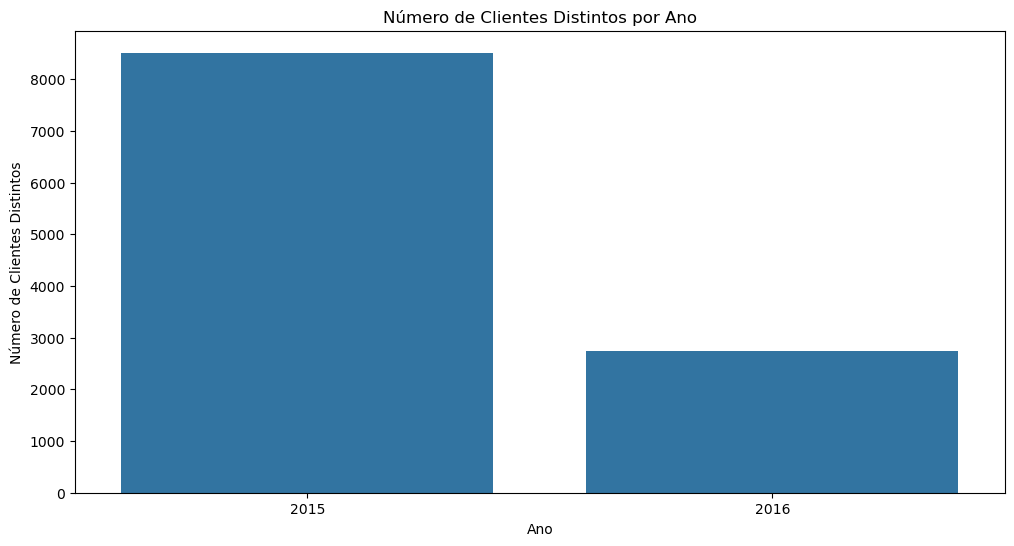

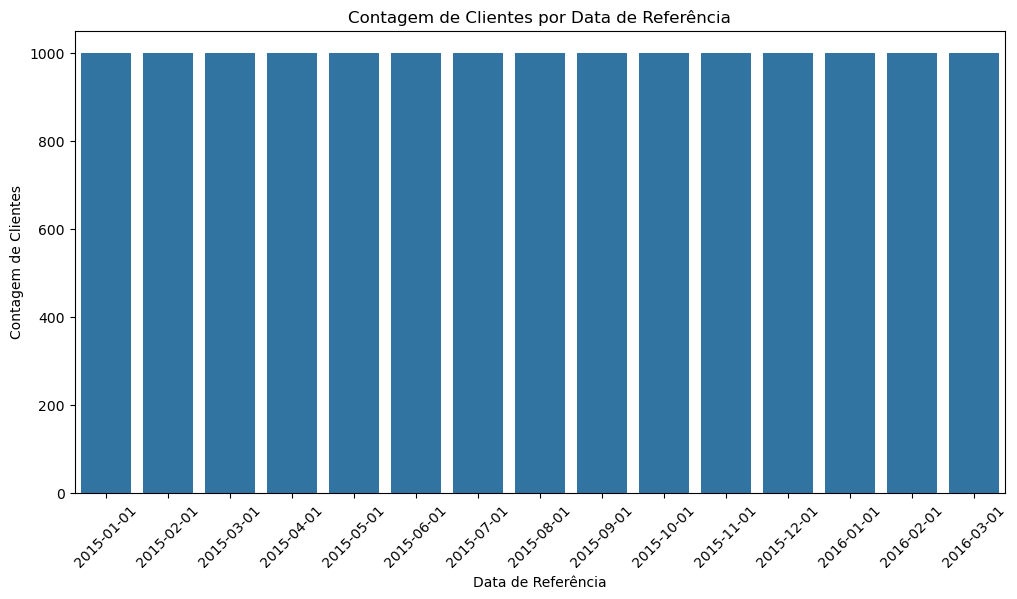

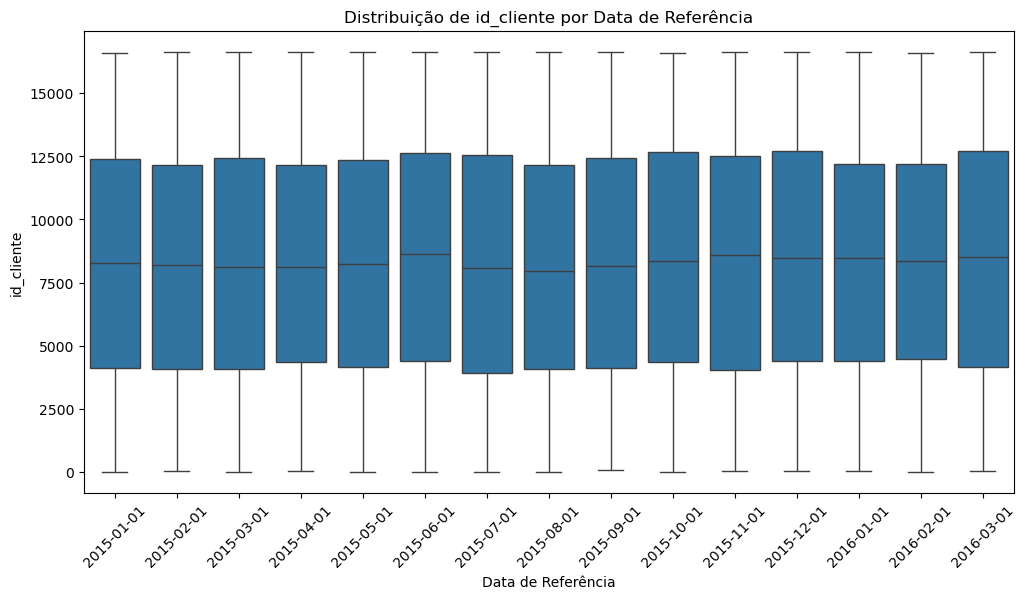

            id_cliente
id_cliente         1.0


In [147]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.drop(labels='Unnamed: 0', axis=1, inplace=True)

renda['data_ref'] = pd.to_datetime(renda['data_ref'], errors='coerce')

print(renda[['data_ref', 'id_cliente']].dtypes)

clientes_por_data = renda.groupby('data_ref')['id_cliente'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=clientes_por_data.index, y=clientes_por_data.values)
plt.title('Número de Clientes por Data')
plt.xlabel('Data de Referência')
plt.ylabel('Número de Clientes Distintos')
plt.xticks(rotation=45)
plt.show()

renda['ano'] = renda['data_ref'].dt.year
clientes_por_ano = renda.groupby('ano')['id_cliente'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=clientes_por_ano.index, y=clientes_por_ano.values)
plt.title('Número de Clientes Distintos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Clientes Distintos')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=renda, x='data_ref')
plt.title('Contagem de Clientes por Data de Referência')
plt.xlabel('Data de Referência')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=renda, x='data_ref', y='id_cliente')
plt.title('Distribuição de id_cliente por Data de Referência')
plt.xlabel('Data de Referência')
plt.ylabel('id_cliente')
plt.xticks(rotation=45)
plt.show()
print(renda[['id_cliente']].corr())


In [149]:
print(renda[['id_cliente']].corr())


            id_cliente
id_cliente         1.0


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [152]:
renda.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)

In [154]:
print(renda.isnull().sum())

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
ano                         0
dtype: int64


In [156]:
categorical_columns = renda.select_dtypes(include=['object']).columns
renda[categorical_columns] = renda[categorical_columns].apply(lambda x: x.astype('category'))
print(renda.dtypes)

sexo                     category
posse_de_veiculo             bool
posse_de_imovel              bool
qtd_filhos                  int64
tipo_renda               category
educacao                 category
estado_civil             category
tipo_residencia          category
idade                       int64
tempo_emprego             float64
qt_pessoas_residencia     float64
renda                     float64
ano                         int32
dtype: object


In [158]:
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,ano
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,2015
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,2015
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,2015
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,2015
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,2015


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [180]:
X_numerico = X.select_dtypes(include=['int64', 'float64'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.3, random_state=42)


In [188]:
X_numerico = X.select_dtypes(include=['int64', 'float64'])
X_numerico = X_numerico.fillna(X_numerico.mean())
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.3, random_state=42)

modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor(max_depth=8, random_state=42)

modelo_lr.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² - Regressão Linear: {r2_lr:.4f}")
print(f"R² - Random Forest:   {r2_rf:.4f}")

R² - Regressão Linear: 0.1560
R² - Random Forest:   0.2280


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:a">A Random Forest teve um desempenho melhor que a Regressão Linear (R² de 0.2280 vs. 0.1560), mas ambos os modelos ainda explicam pouco da variação dos dados.</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [211]:
X_numerico = X.select_dtypes(include=['int64', 'float64'])
X_numerico = X_numerico.fillna(X_numerico.mean())
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.3, random_state=42)
modelo_lr = LinearRegression().fit(X_train, y_train)
modelo_rf = RandomForestRegressor(max_depth=8, random_state=42).fit(X_train, y_train)
r2_lr = r2_score(y_test, modelo_lr.predict(X_test))
r2_rf = r2_score(y_test, modelo_rf.predict(X_test))
print(f"R² - LR: {r2_lr:.4f}, RF: {r2_rf:.4f}")
def motor_de_decisao(dados_novos):
    if len(dados_novos) == X_train.shape[1]:
        previsao_lr = modelo_lr.predict([dados_novos])[0]
        previsao_rf = modelo_rf.predict([dados_novos])[0]
        return ("Aceitar" if max(previsao_lr, previsao_rf) > 50 else "Rejeitar", max(previsao_lr, previsao_rf))
    else:
        return "Erro", None
novos_dados = [25, 35, 45, 30, 40]
decisao, previsao = motor_de_decisao(novos_dados)
print(f"Decisão: {decisao}, Previsão: {previsao:.4f}")


R² - LR: 0.1560, RF: 0.2280
Decisão: Aceitar, Previsão: 29051.4896


C:\Users\Lopes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lopes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
